# Análisis de precios de iPhone 

## Parte 1

Los datos fueron extraídos en agosto mediante web scraping

In [31]:
import pandas as pd

productos = pd.read_csv('productosFinal.csv',index_col=0)
productos

,modelo,precio_normal,precio_oferta,tienda,category
0,iphone 15 pro 256gb,1199990,819990,falabella,pro
1,iphone 15 pro max 256gb,1349990,819990,falabella,pro max
2,iphone 15 128gb,849990,819990,falabella,standard
3,iphone 15 pro max 512gb,1499990,1079990,falabella,pro max
4,iphone 11 128gb,429990,399990,falabella,standard
...,...,...,...,...,...
133,iphone 15 plus 128gb,1999900,999990,movistar,plus
134,iphone 14 plus 512gb,1499990,1399990,movistar,plus
135,iphone 13 pro 1tb,1649990,1649990,movistar,pro
136,iphone 13 512gb,1199990,999990,movistar,standard


In [32]:
valores_nulos = productos.isnull().sum()
valores_nulos

modelo           0
precio_normal    0
precio_oferta    0
tienda           0
category         0
dtype: int64

Al eliminar los duplicados la data se reducio en 34 datos

In [33]:
productos = productos.drop_duplicates()
productos

,modelo,precio_normal,precio_oferta,tienda,category
0,iphone 15 pro 256gb,1199990,819990,falabella,pro
1,iphone 15 pro max 256gb,1349990,819990,falabella,pro max
2,iphone 15 128gb,849990,819990,falabella,standard
3,iphone 15 pro max 512gb,1499990,1079990,falabella,pro max
4,iphone 11 128gb,429990,399990,falabella,standard
...,...,...,...,...,...
133,iphone 15 plus 128gb,1999900,999990,movistar,plus
134,iphone 14 plus 512gb,1499990,1399990,movistar,plus
135,iphone 13 pro 1tb,1649990,1649990,movistar,pro
136,iphone 13 512gb,1199990,999990,movistar,standard


In [34]:
productos['modelo'].unique()

array(['iphone 15 pro 256gb', 'iphone 15 pro max 256gb',
       'iphone 15 128gb', 'iphone 15 pro max 512gb', 'iphone 11 128gb',
       'iphone 15 pro 128gb', 'iphone 15 256gb', 'iphone 14 256gb',
       'iphone 14 128gb', 'iphone 13 128gb', 'iphone 15 512gb',
       'iphone 12 128gb', 'iphone\xa013 128gb',
       'iphone\xa015 pro\xa0max\xa0256gb', 'iphone 11 64gb',
       'iphone 15 plus 128gb', 'iphone\xa015 pro\xa0256gb',
       'iphone\xa015 pro\xa0max\xa0512gb', 'iphone\xa015 pro\xa0128gb',
       'iphone 15 pro max  256gb', 'iphone 13 256gb',
       'iphone 14 plus 256gb', 'iphone 15 negro 256gb',
       'iphone 15 pro 512gb', 'iphone 15 plus 256gb', 'iphone 13 512gb',
       'iphone 15 plus 512gb', 'iphone 14 pro max 128gb',
       'iphone 14 plus 128gb', 'iphone 14 pro 128gb', 'iphone 12 64gb',
       'iphone 14 plus 512gb', 'iphone 13 pro 1tb', 'iphone 14 512gb'],
      dtype=object)

In [35]:
productos['precio_normal']=productos['precio_normal'].astype('float')
productos['precio_oferta']=productos['precio_oferta'].astype('float')


C:\Users\ferna\AppData\Local\Temp\ipykernel_5888\2811734622.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ferna\AppData\Local\Temp\ipykernel_5888\2811734622.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
productos

,modelo,precio_normal,precio_oferta,tienda,category
0,iphone 15 pro 256gb,"1,199,990","819,990",falabella,pro
1,iphone 15 pro max 256gb,"1,349,990","819,990",falabella,pro max
2,iphone 15 128gb,"849,990","819,990",falabella,standard
3,iphone 15 pro max 512gb,"1,499,990","1,079,990",falabella,pro max
4,iphone 11 128gb,"429,990","399,990",falabella,standard
...,...,...,...,...,...
133,iphone 15 plus 128gb,"1,999,900","999,990",movistar,plus
134,iphone 14 plus 512gb,"1,499,990","1,399,990",movistar,plus
135,iphone 13 pro 1tb,"1,649,990","1,649,990",movistar,pro
136,iphone 13 512gb,"1,199,990","999,990",movistar,standard


In [37]:
pd.options.display.float_format = '{:,.0f}'.format

In [38]:
productos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 137
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   modelo         104 non-null    object 
 1   precio_normal  104 non-null    float64
 2   precio_oferta  104 non-null    float64
 3   tienda         104 non-null    object 
 4   category       104 non-null    object 
dtypes: float64(2), object(3)
memory usage: 4.9+ KB


In [39]:
productos.describe()

,precio_normal,precio_oferta
count,104,104
mean,"1,116,292","894,498"
std,"384,380","343,480"
min,"399,990","101,666"
25%,"849,990","652,498"
50%,"1,099,990","859,990"
75%,"1,409,990","1,135,575"
max,"1,999,900","1,649,990"


Las tiendas no traen todos los modelos, esto puede ir variando dependiendo de la disponibilidad

In [40]:
import numpy as np
temp, temp1=np.unique(productos['tienda'], return_counts=True)
temp, temp1

(array(['claro', 'falabella', 'hites', 'la polar', 'lider',
        'mercado libre', 'movistar', 'paris', 'pcfactory', 'ripley', 'wom'],
       dtype=object),
 array([ 6, 12, 12, 10,  6, 14, 13, 12,  3, 10,  6]))

In [41]:
import pandas as pd
import plotly.graph_objects as go

df_temp = pd.DataFrame({'Col A': temp,
                        'Col B': temp1})

fig = go.Figure()

r_values = df_temp['Col B'].tolist() + [df_temp['Col B'][0]]
theta_values = df_temp['Col A'].tolist() + [df_temp['Col A'][0]]

fig.add_trace(go.Scatterpolar(
    r=r_values,
    theta=theta_values,
    fill='toself',
    marker=dict(color='#dcb6a8'),
    name='Cantidad'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(df_temp['Col B'])]
        ),
    ),
    showlegend=True,
    title="Distribución de tiendas",
    width=800,  # Ancho de la imagen
    height=600
)

fig.show()


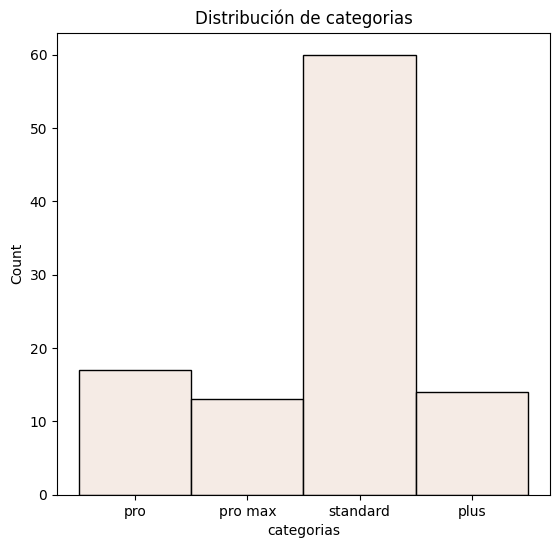

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(productos['category'], color='#f2e5dd', bins=20)
plt.title('Distribución de categorias')
plt.xlabel('categorias')

plt.show()

Se realiza un análisis de la distribución de los precios para identificar las tendencias predominantes.

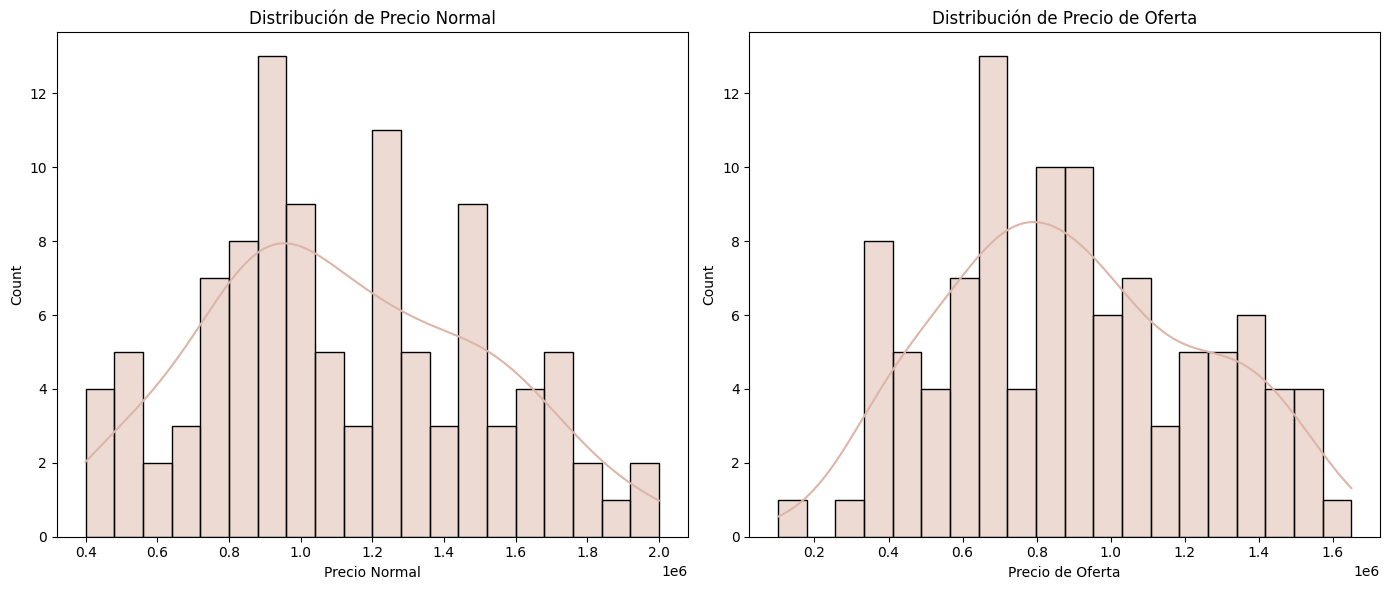

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

mediana_precio_normal = productos['precio_normal'].median()
mediana_precio_oferta = productos['precio_oferta'].median()

# Moda
moda_precio_normal = productos['precio_normal'].mode()[0]
moda_precio_oferta = productos['precio_oferta'].mode()[0]

# Visualización de distribuciones de precios
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(productos['precio_normal'], kde=True, color='#dcb6a8', bins=20)
plt.title('Distribución de Precio Normal')
plt.xlabel('Precio Normal')

plt.subplot(1, 2, 2)
sns.histplot(productos['precio_oferta'], kde=True, color='#dcb6a8', bins=20)
plt.title('Distribución de Precio de Oferta')
plt.xlabel('Precio de Oferta')

plt.tight_layout()
plt.show()

Se realiza un gráfico de caja que muestra la distribución de los precios de oferta de iPhones según su categoría. Se observa que las categorías "Pro Max" y "Pro" tienen los precios más altos, con una menor dispersión, mientras que la categoría "Standard" presenta una mayor variabilidad en los precios, pero con valores significativamente más bajos. La categoría "Plus" muestra precios de oferta comparativamente bajos y menos dispersos. Esta visualización se realizó para resaltar las diferencias en el rango de precios según la gama del producto

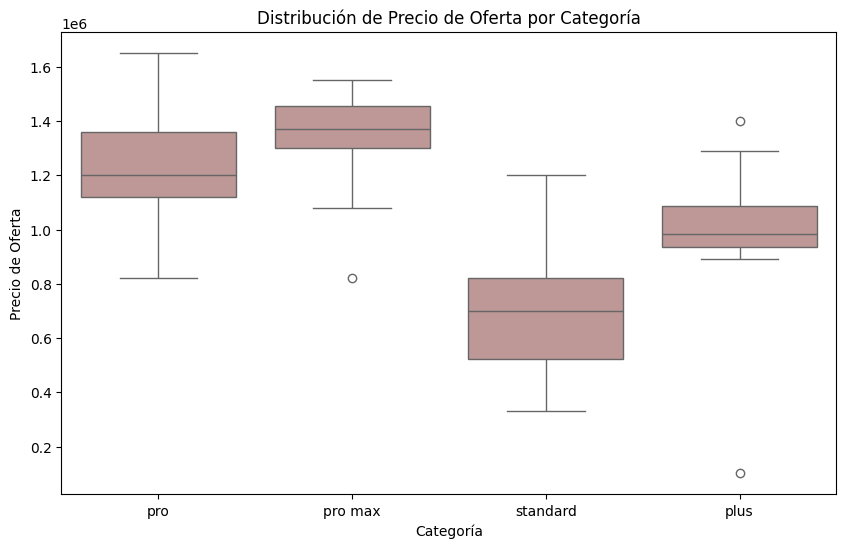

In [44]:
# Boxplot por categoría
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='precio_oferta', data=productos,color='#c49191')
plt.title('Distribución de Precio de Oferta por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Precio de Oferta')
plt.show()


In [45]:
tabla_promedios = productos.groupby('modelo')[['precio_normal', 'precio_oferta']].mean().reset_index()

tabla_promedios

,modelo,precio_normal,precio_oferta
0,iphone 11 128gb,"579,990","427,490"
1,iphone 11 64gb,"557,490","371,854"
2,iphone 12 128gb,"716,657","515,992"
3,iphone 12 64gb,"749,990","564,990"
4,iphone 13 128gb,"774,990","615,462"
5,iphone 13 256gb,"942,490","717,490"
6,iphone 13 512gb,"1,199,990","934,990"
7,iphone 13 pro 1tb,"1,649,990","1,649,990"
8,iphone 14 128gb,"882,212","726,648"
9,iphone 14 256gb,"1,043,323","786,323"


Análisis de Ofertas por Tienda: precio promedio de oferta por tienda

In [46]:
promedio_ofertas_tienda = productos.groupby('tienda')['precio_oferta'].mean().sort_values(ascending=True)
promedio_ofertas_tienda

tienda
falabella         727,490
lider             763,323
hites             862,490
wom               868,400
claro             868,877
paris             869,157
movistar          923,452
la polar          954,990
mercado libre     961,354
ripley            966,990
pcfactory       1,276,990
Name: precio_oferta, dtype: float64

Comparación de Precios de Oferta por Modelo en Diferentes Tiendas

In [47]:
precios_modelo_tienda = productos.pivot_table(index='modelo', columns='tienda', values='precio_oferta')

precios_modelo_tienda['Tienda_Mejor_Precio'] = precios_modelo_tienda.idxmin(axis=1)

precios_modelo_tienda

tienda,claro,falabella,hites,la polar,lider,mercado libre,movistar,paris,pcfactory,ripley,wom,Tienda_Mejor_Precio
modelo,,,,,,,,,,,,
iphone 11 128gb,NaN,"399,990",NaN,NaN,NaN,NaN,"454,990",NaN,NaN,NaN,NaN,falabella
iphone 11 64gb,"329,900",NaN,"399,990","379,990","349,990","359,990","394,990","379,990",NaN,"379,990",NaN,claro
iphone 12 128gb,NaN,"479,990","529,990",NaN,NaN,"625,990","499,990","479,990",NaN,NaN,"480,000",falabella
iphone 12 64gb,NaN,NaN,NaN,NaN,NaN,NaN,"564,990",NaN,NaN,NaN,NaN,movistar
iphone 13 128gb,"623,760","589,990","679,990",NaN,"589,990",NaN,"629,990","529,990",NaN,"619,990","660,000",paris
iphone 13 256gb,NaN,NaN,"729,990","699,990","689,990",NaN,NaN,NaN,NaN,"749,990",NaN,lider
iphone 13 512gb,NaN,NaN,NaN,NaN,NaN,"869,990","999,990",NaN,NaN,NaN,NaN,mercado libre
iphone 13 pro 1tb,NaN,NaN,NaN,NaN,NaN,NaN,"1,649,990",NaN,NaN,NaN,NaN,movistar
iphone 14 128gb,"829,900","719,990","724,990","719,990","699,990",NaN,NaN,"699,990",NaN,"699,990","720,000",lider


Falabella tiende a tener las mejores ofertas pero esto igual varia en los modelos, ejemplo en el iphone 14 128gb, esta mas barato en el lider que en falabella

In [48]:
precios_modelo_tienda['Tienda_Mejor_Precio'].value_counts()

Tienda_Mejor_Precio
falabella        9
paris            7
claro            4
movistar         4
lider            3
mercado libre    3
hites            1
ripley           1
la polar         1
wom              1
Name: count, dtype: int64

Comapración de precios normales 

In [49]:
precios_real_modelo_tienda = productos.pivot_table(index='modelo', columns='tienda', values='precio_normal')

precios_real_modelo_tienda['Tienda_Mejor_Precio'] = precios_real_modelo_tienda.idxmin(axis=1)

precios_real_modelo_tienda

tienda,claro,falabella,hites,la polar,lider,mercado libre,movistar,paris,pcfactory,ripley,wom,Tienda_Mejor_Precio
modelo,,,,,,,,,,,,
iphone 11 128gb,NaN,"429,990",NaN,NaN,NaN,NaN,"729,990",NaN,NaN,NaN,NaN,falabella
iphone 11 64gb,"769,990",NaN,"699,990","499,990","469,990","669,990","549,990","399,990",NaN,"399,990",NaN,paris
iphone 12 128gb,NaN,"499,990","799,990",NaN,NaN,"949,990","749,990","499,990",NaN,NaN,"799,990",falabella
iphone 12 64gb,NaN,NaN,NaN,NaN,NaN,NaN,"749,990",NaN,NaN,NaN,NaN,movistar
iphone 13 128gb,"889,990","619,990","869,990",NaN,"869,990",NaN,"879,990","529,990",NaN,"649,990","889,990",paris
iphone 13 256gb,NaN,NaN,"929,990","939,990","899,990",NaN,NaN,NaN,NaN,"999,990",NaN,lider
iphone 13 512gb,NaN,NaN,NaN,NaN,NaN,"1,199,990","1,199,990",NaN,NaN,NaN,NaN,mercado libre
iphone 13 pro 1tb,NaN,NaN,NaN,NaN,NaN,NaN,"1,649,990",NaN,NaN,NaN,NaN,movistar
iphone 14 128gb,"1,029,990","739,990","949,990","949,990","899,990",NaN,NaN,"729,990",NaN,"739,990","949,990",paris


Aun en precio real falabella sigue siendo el mas barato esto igual depende de los modelos

In [50]:
precios_real_modelo_tienda['Tienda_Mejor_Precio'].value_counts()

Tienda_Mejor_Precio
falabella        10
paris             9
movistar          4
mercado libre     4
claro             3
lider             2
hites             1
wom               1
Name: count, dtype: int64

Tienda con Mayor Variedad de Modelos: movistar tiene disponible mas modelos que las otras tiendas

In [51]:
variedad_modelos_tienda = productos.groupby('tienda')['modelo'].nunique().sort_values(ascending=False)
variedad_modelos_tienda

tienda
movistar         13
falabella        12
hites            11
paris            11
ripley           10
mercado libre    10
la polar         10
claro             6
lider             6
wom               6
pcfactory         2
Name: modelo, dtype: int64

Análisis de tendencias de precio

Acá se comparan las ofertas con los precios reales, en pcfactory tiene un precio promedio en ofertas mas elevados que en comparacion de otras tienedas, es decir su valor de oferta con el precio real  no baja tanto en comparacion a los otros, por otro lado falabellaa tiene ofertas mas bajas a comparacion con sus precios reales, es decir que sus precios en oferta son mas economicos.

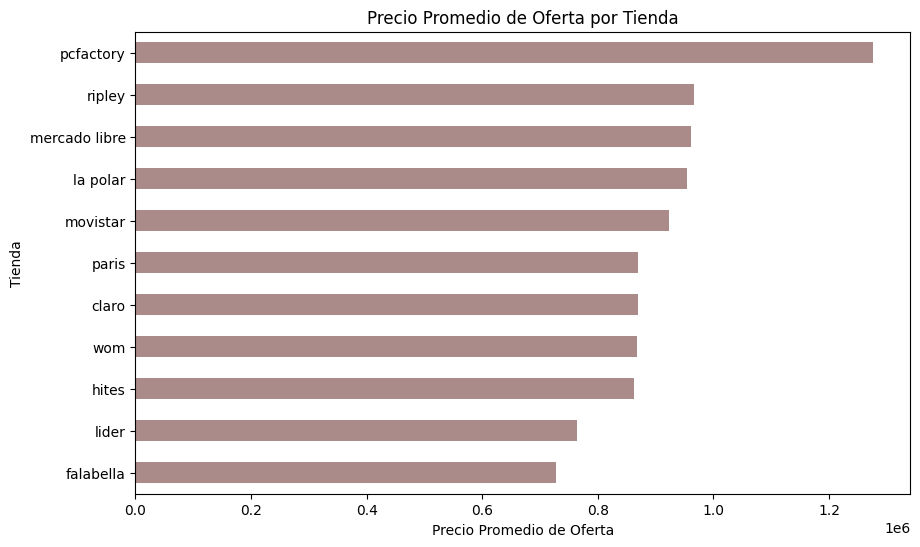

In [52]:
tendencias_precios = productos.groupby(['modelo', 'tienda']).agg({
    'precio_normal': ['mean', 'std'],
    'precio_oferta': ['mean', 'std']
}).reset_index()

plt.figure(figsize=(10, 6))
promedio_ofertas_tienda.plot(kind='barh', color='#ab8a8a')
plt.title('Precio Promedio de Oferta por Tienda')
plt.xlabel('Precio Promedio de Oferta')
plt.ylabel('Tienda')
plt.show()

In [53]:
import pandas as pd
import plotly.express as px

precios_normales = productos.pivot_table(index='modelo', columns='tienda', values='precio_normal')
precios_normales['Tienda_Mejor_Precio_Normal'] = precios_normales.idxmin(axis=1)
precios_normales['Precio_Normal_Más_Bajo'] = precios_normales.select_dtypes(include=['float64', 'int64']).min(axis=1)

precios_oferta = productos.pivot_table(index='modelo', columns='tienda', values='precio_oferta')
precios_oferta['Tienda_Mejor_Oferta'] = precios_oferta.idxmin(axis=1)
precios_oferta['Precio_Oferta_Más_Bajo'] = precios_oferta.select_dtypes(include=['float64', 'int64']).min(axis=1)

resultados = pd.concat([precios_oferta[['Tienda_Mejor_Oferta', 'Precio_Oferta_Más_Bajo']], precios_normales[['Tienda_Mejor_Precio_Normal', 'Precio_Normal_Más_Bajo']]], axis=1)

fig = px.scatter(resultados.reset_index(), x='Precio_Oferta_Más_Bajo', y='Precio_Normal_Más_Bajo',
                 hover_data=['modelo', 'Tienda_Mejor_Oferta', 'Tienda_Mejor_Precio_Normal'],
                 labels={
                     "Precio_Oferta_Más_Bajo": "Precio de Oferta Más Bajo",
                     "Precio_Normal_Más_Bajo": "Precio Normal Más Bajo"
                 },
                 title="Comparación de Precios de Oferta y Normal por Modelo")

fig.show()


In [55]:
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact

precios_normales = productos.pivot_table(index='modelo', columns='tienda', values='precio_normal')
precios_normales['Tienda_Mejor_Precio_Normal'] = precios_normales.idxmin(axis=1)
precios_normales['Precio_Normal_Más_Bajo'] = precios_normales.select_dtypes(include=['float64', 'int64']).min(axis=1)

precios_oferta = productos.pivot_table(index='modelo', columns='tienda', values='precio_oferta')
precios_oferta['Tienda_Mejor_Oferta'] = precios_oferta.idxmin(axis=1)
precios_oferta['Precio_Oferta_Más_Bajo'] = precios_oferta.select_dtypes(include=['float64', 'int64']).min(axis=1)

resultados = pd.concat([precios_oferta[['Tienda_Mejor_Oferta', 'Precio_Oferta_Más_Bajo']], precios_normales[['Tienda_Mejor_Precio_Normal', 'Precio_Normal_Más_Bajo']]], axis=1)

def update_graph(modelo):
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=[resultados.loc[modelo]['Tienda_Mejor_Oferta']],
        y=[resultados.loc[modelo]['Precio_Oferta_Más_Bajo']],
        name='Precio de Oferta',
        marker_color='#ab8a8a'
    ))

    fig.add_trace(go.Bar(
        x=[resultados.loc[modelo]['Tienda_Mejor_Precio_Normal']],
        y=[resultados.loc[modelo]['Precio_Normal_Más_Bajo']],
        name='Precio Normal',
        marker_color='#dcb6a8'
    ))

    fig.update_layout(
        title=f'Precios para {modelo.title()}',
        xaxis_title='Tienda',
        yaxis_title='Precio',
        barmode='group'
    )

    fig.show()

interact(update_graph, modelo=list(resultados.index))


interactive(children=(Dropdown(description='modelo', options=('iphone 11 128gb', 'iphone 11 64gb', 'iphone 12 …

<function __main__.update_graph(modelo)>

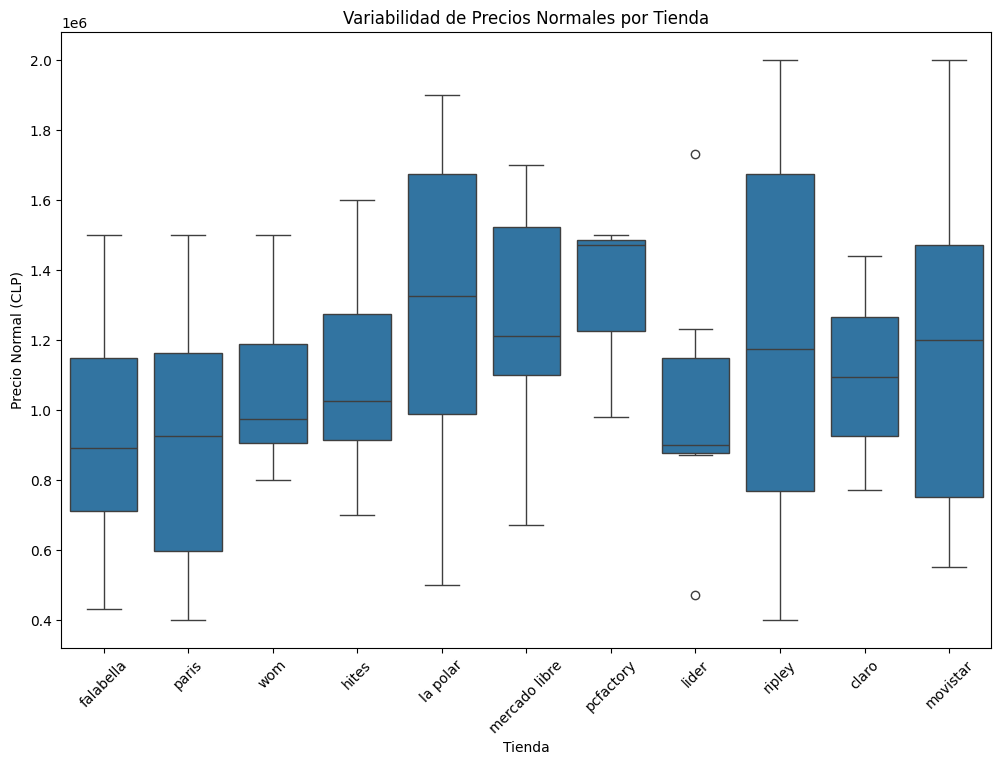

In [56]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='tienda', y='precio_normal', data=productos)
plt.xticks(rotation=45)
plt.title('Variabilidad de Precios Normales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Precio Normal (CLP)')
plt.show()


## Parte 2

In [63]:
productos

,modelo,precio_normal,precio_oferta,tienda,category
0,iphone 15 pro 256gb,"1,199,990","819,990",falabella,pro
1,iphone 15 pro max 256gb,"1,349,990","819,990",falabella,pro max
2,iphone 15 128gb,"849,990","819,990",falabella,standard
3,iphone 15 pro max 512gb,"1,499,990","1,079,990",falabella,pro max
4,iphone 11 128gb,"429,990","399,990",falabella,standard
...,...,...,...,...,...
133,iphone 15 plus 128gb,"1,999,900","999,990",movistar,plus
134,iphone 14 plus 512gb,"1,499,990","1,399,990",movistar,plus
135,iphone 13 pro 1tb,"1,649,990","1,649,990",movistar,pro
136,iphone 13 512gb,"1,199,990","999,990",movistar,standard


Para facilitar la comparación, se calcula el promedio del porcentaje de oferta por tienda, agrupado por categoría.

In [65]:
productos['descuento'] = ((productos['precio_normal'] - productos['precio_oferta']) / productos['precio_normal']) * 100

result = productos.groupby(['tienda', 'category']).agg({'descuento': 'mean', 'category': 'count'}).rename(columns={'category': 'count'}).reset_index()

result['descuento'] = result['descuento']
result


C:\Users\ferna\AppData\Local\Temp\ipykernel_5888\269650237.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tienda,category,descuento,count
0,claro,plus,18,1
1,claro,pro,9,1
2,claro,pro max,10,1
3,claro,standard,35,3
4,falabella,pro,18,2
5,falabella,pro max,34,2
6,falabella,standard,13,8
7,hites,plus,28,1
8,hites,pro,17,1
9,hites,pro max,13,1


C:\Users\ferna\AppData\Local\Temp\ipykernel_5888\3871089243.py:20: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



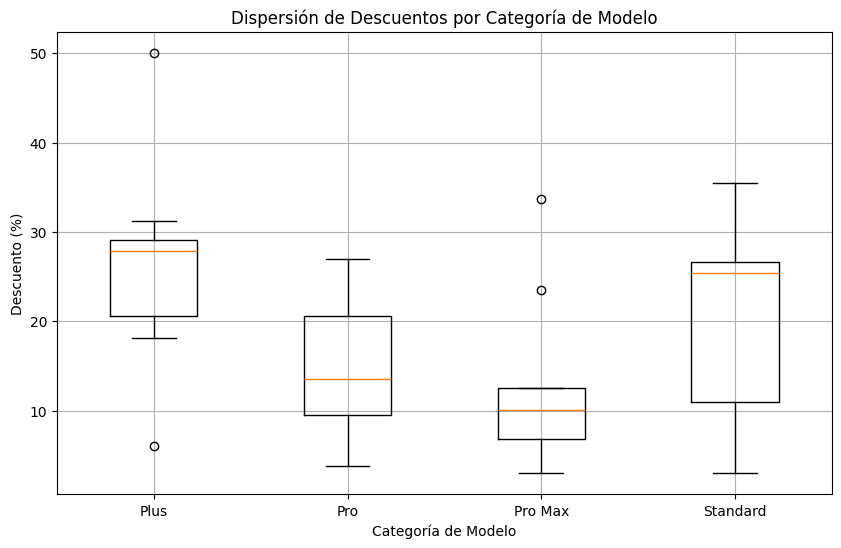

(np.float64(0.0467612830529636), np.float64(0.34871115735707453), None)

In [66]:
from scipy.stats import f_oneway, chi2_contingency

anova_result = f_oneway(
    result[result['category'] == 'plus']['descuento'],
    result[result['category'] == 'pro']['descuento'],
    result[result['category'] == 'pro max']['descuento'],
    result[result['category'] == 'standard']['descuento']
)

contingency_table = pd.crosstab(result['tienda'], result['descuento'])

chi2_result = chi2_contingency(contingency_table)

plt.figure(figsize=(10, 6))
plt.boxplot([result[result['category'] == 'plus']['descuento'],
             result[result['category'] == 'pro']['descuento'],
             result[result['category'] == 'pro max']['descuento'],
             result[result['category'] == 'standard']['descuento']],
            labels=['Plus', 'Pro', 'Pro Max', 'Standard'])
plt.title('Dispersión de Descuentos por Categoría de Modelo')
plt.ylabel('Descuento (%)')
plt.xlabel('Categoría de Modelo')
plt.grid(True)

anova_result.pvalue, chi2_result[1], plt.show()


Los modelos Plus y Standard tienden a tener los mayores descuentos en términos de mediana.
Los modelos Pro Max presentan los descuentos más bajos.
Los modelos Pro tienen una mediana de descuento más baja en comparación con Plus y Standard.
Hay un outlier en la categoría Plus donde un modelo alcanzó un descuento muy alto cercano al 50%.

Este valor p = 0.0467 indica que existe una diferencia estadísticamente significativa entre las categorías de modelos al nivel de significancia del 5% (es decir, p < 0.05). En otras palabras, los descuentos ofrecidos entre las categorías (Plus, Pro, Pro Max, Standard) no son iguales, y al menos una de las categorías tiene un descuento promedio significativamente diferente de las demás.

Este valor p = 0.3487 indica que no hay una relación significativa entre las tiendas y los descuentos. Es decir, no hay suficiente evidencia para concluir que las tiendas y los descuentos están relacionados de manera significativa. Esto sugiere que las tiendas no tienen patrones consistentes en los descuentos que ofrezcan.

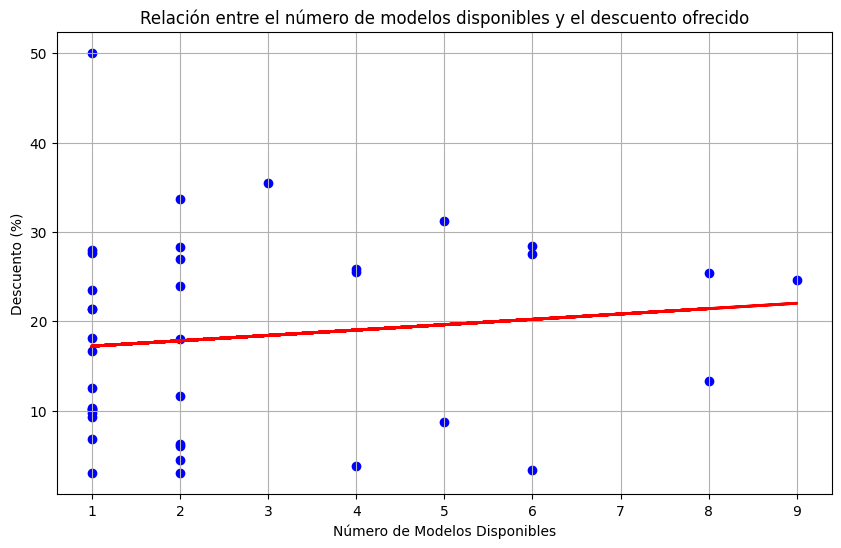

(0.015260586961764577,
 np.float64(0.12353374827052017),
 np.float64(0.45996038230614866),
 None)

In [71]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

X = result[['count']].values  
y = result['descuento'].values  


reg_model = LinearRegression()
reg_model.fit(X, y)
r_squared = reg_model.score(X, y)  

corr_coef, p_value_corr = pearsonr(result['count'], result['descuento'])

plt.figure(figsize=(10, 6))
plt.scatter(result['count'], result['descuento'], color='blue')
plt.plot(result['count'], reg_model.predict(X), color='red', linewidth=2)
plt.title('Relación entre el número de modelos disponibles y el descuento ofrecido')
plt.xlabel('Número de Modelos Disponibles')
plt.ylabel('Descuento (%)')
plt.grid(True)

r_squared, corr_coef, p_value_corr, plt.show()


Gráfico de dispersión:

Los puntos azules representan los datos observados (el número de modelos disponibles frente al descuento ofrecido).
La línea roja es la línea de regresión que intenta ajustar la relación entre las dos variables.
Línea de regresión:

La línea roja tiene una ligera pendiente ascendente, lo que sugiere que a medida que aumenta el número de modelos disponibles, también aumenta el descuento, aunque muy débilmente.

1. R² (0.0153)
El valor 
𝑅2=0.0153
R2=0.0153 indica que solo el 1.53% de la variabilidad en los descuentos puede explicarse por el número de modelos disponibles. Esto sugiere que el número de modelos disponibles no es un buen predictor del descuento ofrecido, ya que el modelo solo explica una porción muy pequeña de la variabilidad en los descuentos.

2. Coeficiente de correlación de Pearson (0.1235)
El coeficiente de correlación de Pearson 
𝑟=0.1235
r=0.1235 sugiere una correlación positiva muy débil entre el número de modelos disponibles y el descuento ofrecido. Este valor está muy cercano a 0, lo que indica que prácticamente no hay una relación lineal entre estas dos variables.

3. Valor p (0.4599)
El valor p 
𝑝=0.4599
p=0.4599 es mucho mayor que 0.05, lo que significa que no hay evidencia estadísticamente significativa de una relación entre el número de modelos disponibles y los descuentos ofrecidos. En otras palabras, no podemos rechazar la hipótesis nula de que no existe una relación entre estas dos variables.

In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_clean = pd.get_dummies(result, columns=['tienda', 'category'], drop_first=True)

X_multi = df_clean.drop(columns=['descuento', 'count'])
y_multi = df_clean['descuento']

reg_multi_model = LinearRegression()
reg_multi_model.fit(X_multi, y_multi)

coefficients = reg_multi_model.coef_
r_squared_multi = reg_multi_model.score(X_multi, y_multi)

coef_table = pd.DataFrame({'Variable': X_multi.columns, 'Coeficiente': coefficients})

r_squared_multi, coef_table


(0.5486940857880243,
                 Variable  Coeficiente
 0       tienda_falabella            6
 1           tienda_hites            2
 2        tienda_la polar            7
 3           tienda_lider            5
 4   tienda_mercado libre            2
 5        tienda_movistar           -2
 6           tienda_paris          -16
 7       tienda_pcfactory          -13
 8          tienda_ripley            4
 9             tienda_wom           -0
 10          category_pro          -12
 11      category_pro max          -14
 12     category_standard           -5)

1. Coeficiente de determinación 
𝑅
2
=
0.5487
R 
2
 =0.5487
Este valor de 
𝑅
2
R 
2
  indica que aproximadamente el 54.87% de la variabilidad en los descuentos puede explicarse por las variables independientes (las tiendas y las categorías de modelo). Esto significa que el modelo tiene una capacidad moderada para predecir los descuentos en función de la tienda y la categoría.

2. Coeficientes de las variables:
Cada variable categórica (tienda y categoría) tiene un coeficiente asociado, lo que indica cómo impacta esa variable en los descuentos. Estos coeficientes se interpretan de la siguiente manera:

Tiendas:

Falabella: 
+
6
+6 sugiere que, en promedio, los descuentos ofrecidos en Falabella son 6 puntos porcentuales mayores que la tienda de referencia (que podría ser "Claro", si no fue eliminada como referencia en drop_first=True).
Hites: 
+
2
+2 indica que Hites ofrece 2 puntos porcentuales más de descuento que la tienda de referencia.
La Polar: 
+
7
+7, La Polar tiende a ofrecer 7 puntos porcentuales más de descuento.
Movistar: 
−
2
−2, Movistar ofrece 2 puntos porcentuales menos de descuento que la tienda de referencia.
Paris: 
−
16
−16, Paris ofrece 16 puntos porcentuales menos, lo cual es un descuento significativamente menor.
PcFactory: 
−
13
−13, esta tienda ofrece 13 puntos porcentuales menos.
Categorías de modelos:

Pro: 
−
12
−12, los modelos Pro tienden a tener 12 puntos porcentuales menos de descuento en comparación con los modelos de referencia (Plus, posiblemente).
Pro Max: 
−
14
−14, los modelos Pro Max también reciben descuentos más bajos.
Standard: 
−
5
−5, los modelos Standard reciben 5 puntos porcentuales menos de descuento que los modelos de referencia.
Interpretación general:
Las tiendas como Falabella y La Polar parecen ofrecer mayores descuentos en promedio, mientras que Paris y PcFactory tienden a ofrecer los menores descuentos.
En cuanto a las categorías de modelo, los modelos Pro y Pro Max generalmente reciben menos descuento en comparación con los modelos de referencia (posiblemente los Plus).
El modelo tiene una capacidad razonable para predecir los descuentos basándose en la tienda y la categoría, aunque no es perfecto (ya que el 
𝑅
2
R 
2
  es 0.5487).